<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Новые-столбцы" data-toc-modified-id="Новые-столбцы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Новые столбцы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Самые-активные-участники" data-toc-modified-id="Самые-активные-участники-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Самые активные участники</a></span><ul class="toc-item"><li><span><a href="#Аномальная-активность-в-когортах" data-toc-modified-id="Аномальная-активность-в-когортах-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Аномальная активность в когортах</a></span></li></ul></li><li><span><a href="#Какие-сообщения-провоцируют-наибольший-отклик" data-toc-modified-id="Какие-сообщения-провоцируют-наибольший-отклик-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Какие сообщения провоцируют наибольший отклик</a></span></li><li><span><a href="#Новые-когорты" data-toc-modified-id="Новые-когорты-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Новые когорты</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

**Описание проекта:**

Для анализа предлагаются данные о сообщениях студентов Яндекс Практикума в чатах.

🔸 Цель проекта - проанализировать активность в чатах Пачки и Слак.

🔸 Проблема – низкая обратная связь на важные посты, публикуемые в чатах

🔸 Задачи:
 - проанализировать поведение студентов в чатах;
 - выявить паттерны, динамику, цикличность в течение дня, недели, месяца, года;
 - визуализировать свои находки;
 - помочь нам понять, когда активность студентов в чатах наибольшая, и когда лучше публиковать посты/анонсы, чтобы получить больше откликов;
 - проанализировать различные типы каналов, когорт, групп;
 - оценить в каких общения больше, в каких меньше, и как они различаются от когорты к когорте, от канала к каналу. 
 
**Описание данных:**
- `Unnamed: 0` - индекс (можно удалить)
- `client_msg_id` - id сообщения 
- `type` - тип поста 
- `user` - id пользователя 
- `ts` - дата поста
- `thread_ts` - дата треда
- `latest_reply` - дата ответа
- `team` - факт вхождения в неизвестную группу (?) 
- `subtype` - метка действий пользователя 
- `channel` - канал 
- `file_date` - дата файла 
- `attachments` - прикреплённые файлы  
- `reactions` - реакции 
- `text_len` - длина текста сообщения  
- `text_words` - количество слов в сообщении

## Загрузка данных

In [1]:
import pandas as pd
from datetime import datetime
import ast
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None # уберём предупреждения

In [2]:
df = pd.read_csv('chat_data_clean.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26533 entries, 0 to 26532
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   client_msg_id  18262 non-null  object 
 1   type           26533 non-null  object 
 2   user           23643 non-null  object 
 3   ts             26533 non-null  float64
 4   latest_reply   2303 non-null   float64
 5   team           15857 non-null  object 
 6   thread_ts      18222 non-null  float64
 7   subtype        8317 non-null   object 
 8   channel        26533 non-null  object 
 9   file_date      26533 non-null  object 
 10  attachments    26533 non-null  int64  
 11  reactions      4169 non-null   object 
 12  text_len       26533 non-null  int64  
 13  text_words     26533 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 3.0+ MB


In [3]:
df.head()

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,1.669643e+09,1.669645e+09,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,1.669645e+09,NaN,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,1.669647e+09,NaN,NaN,NaN,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,1.669709e+09,1.669719e+09,NaN,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,1.669711e+09,NaN,TPV9DP0N4,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2


Функции, которые потребуются для работы:

In [4]:
def count_nan(dataframe):
    'функция считает пропуски в столбцах и возвращает процент пропусков по столбцам датафрейма'
    nan_count = [] # list for number of empty entries by column
    nan_percent = [] # list for percent of empty entries by column

    for col in dataframe.columns:
        nan_count.append(dataframe[col].isnull().sum())
        nan_percent.append(dataframe[col].isnull().sum()/len(dataframe[col]))
    incomplete = pd.DataFrame(data={
        'column':dataframe.columns,
        'nan_count':nan_count,
        'nan_percent':nan_percent
    })

    incomplete['nan_percent'] = incomplete['nan_percent'].round(2)
    return incomplete

In [5]:
def count_reactions(reactions):
    'Функция для подсчёта общего количества реакций к сообщению'
    try:
        sample = ast.literal_eval(reactions)
        return sum([item['count'] for item in sample])
    except:
        return 0

In [6]:
def cut_channel(cell):
    'функция по категоризации каналов'
    channels = ['info', 'project', 'exerciser', 'teamwork']
    for channel in channels:
        if channel in cell:
            return channel
    return 'other'

In [7]:
def cohort(channel):
    'функция выделяет номер когорты из названия канала'
    try:
        return re.search(r'_(\d+|\d+b)_', channel)[0].strip('_')
    except:
        pass

## Предобработка данных

### Дубликаты
Проверим есть ли в данных явные дубликаты.

In [8]:
df.duplicated().sum()

0

Явных полных дубликатов нет. Посмотрим что с неполными.

In [9]:
df['client_msg_id'].duplicated().sum()

8270

In [10]:
df[df['client_msg_id'].duplicated()==True]['client_msg_id'].unique()

array([nan], dtype=object)

Все дубликаты в поле `client_msg_id` - это не дубликаты, а пропуски. Можно сказать, что дубликатов в данных нет.

### Пропуски

In [11]:
count_nan(df)

,column,nan_count,nan_percent
0,client_msg_id,8271,0.31
1,type,0,0.00
2,user,2890,0.11
3,ts,0,0.00
4,latest_reply,24230,0.91
5,team,10676,0.40
6,thread_ts,8311,0.31
7,subtype,18216,0.69
8,channel,0,0.00
9,file_date,0,0.00


Больше всего интересуют пропуски в столбцах `client_msg_id` и `user`. Если реакций или ответов к посту могло не быть, то идентификационный номер сообщения и пользователя, который его написал, должен быть всегда.

Посмотрим подробнее на сообщения, у которых нет данных об id пользователя.

In [12]:
df_userna = df[df['user'].isna()==True]
count_nan(df_userna)

,column,nan_count,nan_percent
0,client_msg_id,2890,1.00
1,type,0,0.00
2,user,2890,1.00
3,ts,0,0.00
4,latest_reply,1977,0.68
5,team,2888,1.00
6,thread_ts,1971,0.68
7,subtype,0,0.00
8,channel,0,0.00
9,file_date,0,0.00


In [13]:
df_userna['subtype'].unique()

array(['bot_message'], dtype=object)

Сообщения без id пользователя - это сообщения, созданные ботами. К ним практически никогда не бывает реакций, но довольно часто на них отвечают, поэтому пока не будем исключать их из анализа.

In [14]:
df_msgna = df[df['client_msg_id'].isna()==True]
count_nan(df_msgna)

,column,nan_count,nan_percent
0,client_msg_id,8271,1.00
1,type,0,0.00
2,user,2890,0.35
3,ts,0,0.00
4,latest_reply,7307,0.88
5,team,8117,0.98
6,thread_ts,7301,0.88
7,subtype,62,0.01
8,channel,0,0.00
9,file_date,0,0.00


In [15]:
df_msgna['subtype'].unique()

array(['channel_join', 'bot_remove', nan, 'channel_unarchive',
       'channel_leave', 'bot_message', 'channel_purpose', 'tombstone',
       'channel_name'], dtype=object)

In [16]:
df['subtype'].unique()

array([nan, 'channel_join', 'bot_remove', 'thread_broadcast',
       'channel_unarchive', 'channel_leave', 'bot_message',
       'channel_purpose', 'tombstone', 'channel_name'], dtype=object)

Сообщения без номера - это преимущественно технические сообщения, можно избавиться от сообщений всех подтипов, кроме `thread_broadcast`.

In [17]:
df = pd.concat([df.loc[df['subtype']=='thread_broadcast'], df.loc[df['subtype'].isna()==True]]).reset_index(drop=True)
df.head()

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,92d1b171-f2b6-4d5a-87aa-d681f237f722,message,U014AF3TC15,1.670230e+09,NaN,NaN,1.669381e+09,thread_broadcast,data_edteam_info,2022-12-05,0,NaN,200,15
1,ad0dd487-ba64-49a7-98d3-2364d39b755e,message,U01DVNLSSBZ,1.670585e+09,NaN,NaN,1.670399e+09,thread_broadcast,data_edteam_info,2022-12-09,0,NaN,55,7
2,ccc70612-28af-4332-818f-d0ef0236a3d6,message,U014AF3TC15,1.671116e+09,NaN,NaN,1.670928e+09,thread_broadcast,data_edteam_info,2022-12-15,0,NaN,506,62
3,d4b5c848-f8f5-4603-a322-9d491c07e1a5,message,U03KA4UAQM7,1.669805e+09,NaN,NaN,1.669804e+09,thread_broadcast,da_52_info,2022-11-30,0,"[{'name': 'smile', 'users': ['U03G63NGS6B', 'U...",100,15
4,f32ad28b-d879-469d-9b75-5c9504a2467f,message,U0319NFJ92S,1.669911e+09,NaN,NaN,1.669907e+09,thread_broadcast,da_52_info,2022-12-01,0,"[{'name': 'heavy_plus_sign', 'users': ['U03759...",216,30


In [18]:
count_nan(df)

,column,nan_count,nan_percent
0,client_msg_id,62,0.00
1,type,0,0.00
2,user,0,0.00
3,ts,0,0.00
4,latest_reply,16948,0.92
5,team,2559,0.14
6,thread_ts,1035,0.06
7,subtype,18216,0.99
8,channel,0,0.00
9,file_date,0,0.00


Пропуски удалены. Посмотрим ещё на уникальные значения в некоторых столбцах.

In [19]:
df['type'].unique()

array(['message'], dtype=object)

В столбце `type` только одно значение, можно его удалить.

In [20]:
df = df.drop(columns=['type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   client_msg_id  18262 non-null  object 
 1   user           18324 non-null  object 
 2   ts             18324 non-null  float64
 3   latest_reply   1376 non-null   float64
 4   team           15765 non-null  object 
 5   thread_ts      17289 non-null  float64
 6   subtype        108 non-null    object 
 7   channel        18324 non-null  object 
 8   file_date      18324 non-null  object 
 9   attachments    18324 non-null  int64  
 10  reactions      4105 non-null   object 
 11  text_len       18324 non-null  int64  
 12  text_words     18324 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 1.8+ MB


### Типы данных

In [21]:
df['team'].unique()

array([nan, 'TPV9DP0N4'], dtype=object)

В столбце `team` только два значения, можно преобразовать их в True-False.

In [22]:
df['team'] = df['team'].replace('TPV9DP0N4', True).fillna(False)
df['team'].unique()

array([False,  True])

In [23]:
df['attachments'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

Значения в столбце `attachments` похоже указывают на количество вложений. Оставим без изменений.

Посмотрим в каком формате записаны даты в столбцах `ts`, `thread_ts` и `file_date`.

In [24]:
df[['ts','thread_ts', 'file_date']].head()

,ts,thread_ts,file_date
0,1.670230e+09,1.669381e+09,2022-12-05
1,1.670585e+09,1.670399e+09,2022-12-09
2,1.671116e+09,1.670928e+09,2022-12-15
3,1.669805e+09,1.669804e+09,2022-11-30
4,1.669911e+09,1.669907e+09,2022-12-01


Преобразуем их в `datetime`.

In [25]:
df['file_date'] = pd.to_datetime(df['file_date'], format='%Y-%m-%d')

In [28]:
df.ts = pd.to_datetime(df.ts, unit='s')
df.thread_ts = pd.to_datetime(df.thread_ts, unit='s')

In [29]:
df[['ts','thread_ts']].head()

,ts,thread_ts
0,2022-12-05 08:47:07,2022-11-25 12:51:26
1,2022-12-09 11:21:59,2022-12-07 07:37:22
2,2022-12-15 14:53:57,2022-12-13 10:45:29
3,2022-11-30 10:51:32,2022-11-30 10:25:16
4,2022-12-01 16:04:16,2022-12-01 15:09:49


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_msg_id  18262 non-null  object        
 1   user           18324 non-null  object        
 2   ts             18324 non-null  datetime64[ns]
 3   latest_reply   1376 non-null   float64       
 4   team           18324 non-null  bool          
 5   thread_ts      17289 non-null  datetime64[ns]
 6   subtype        108 non-null    object        
 7   channel        18324 non-null  object        
 8   file_date      18324 non-null  datetime64[ns]
 9   attachments    18324 non-null  int64         
 10  reactions      4105 non-null   object        
 11  text_len       18324 non-null  int64         
 12  text_words     18324 non-null  int64         
dtypes: bool(1), datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 1.7+ MB


### Новые столбцы

In [31]:
sample = ast.literal_eval(df[df['reactions'].isna()==False].iloc[8,10])
sample

[{'name': 'ok_hand',
  'users': ['U0410ULSKDF',
   'U0472DGDUKS',
   'U046CK889L3',
   'U046CL312DR',
   'U046CNHFE02',
   'U045Y59M20P',
   'U04663MQNA2',
   'U0463E6CMN3',
   'U04664DS75L',
   'U046RAYCPQ9'],
  'count': 10},
 {'name': 'ok_hand::skin-tone-4', 'users': ['U046F68REMS'], 'count': 1},
 {'name': 'ok_hand::skin-tone-2', 'users': ['U046CKAT1R9'], 'count': 1}]

Значения в столбце `reactions` представляют собой словарь (или список словарей) с указанием названия реакции, пользователей, оставивших эту реакцию, и числа реакций. Хорошо бы извлечь из этой строки общее число реакций на пост.

In [32]:
sum([item['count'] for item in sample])

12

In [33]:
df['reactions_count'] = df['reactions'].apply(count_reactions)
df[['reactions','reactions_count']].head(10)

,reactions,reactions_count
0,NaN,0
1,NaN,0
2,NaN,0
3,"[{'name': 'smile', 'users': ['U03G63NGS6B', 'U...",5
4,"[{'name': 'heavy_plus_sign', 'users': ['U03759...",3
5,NaN,0
6,NaN,0
7,"[{'name': '+1', 'users': ['U03N73HV3BR', 'U03L...",2
8,NaN,0
9,NaN,0


In [34]:
df['channel'].str.contains('info').sum()

2823

In [35]:
df['channel'].str.contains('project').sum()

5738

In [36]:
df['channel'].str.contains('exerciser').sum()

4036

In [37]:
df['channel'].str.contains('teamwork').sum()

3346

Из названий канала в столбце `сhannel` тоже можно извлечь полезную информацию:
- номер когорты,
- тип канала (основные типы - info, project, exerciser и teamwork)
- специальность (da, ds, dl и de).

In [38]:
df['channel_type'] = df['channel'].apply(cut_channel)
df['channel_type'].unique()

array(['info', 'exerciser', 'project', 'teamwork', 'other'], dtype=object)

In [39]:
df['channel'][456].split('_')[0]

'da'

In [40]:
# Определим специальность
df['profession'] = df['channel'].apply(lambda x: x.split('_')[0])
df['profession'].unique()

array(['data', 'da', 'de', 'ds', 'masterskaya', 'data-analysts-bus', 'dl',
       'sql'], dtype=object)

Направления, которые определились как `data` и `data-analysts-bus`, скорее всего, служебные. `masterskaya` - тоже не похоже на направление обучения. Удалим эти сообщения, чтобы не мешали анализу:

In [41]:
remove_prof = ['data', 'data-analysts-bus', 'masterskaya']
df = df.query('profession not in @remove_prof')
df['profession'].unique()

array(['da', 'de', 'ds', 'dl', 'sql'], dtype=object)

In [42]:
# Определим когорту
df['cohort'] = df['channel'].apply(cohort)
df['cohort'] = df['profession'] + '_' + df['cohort']
df['cohort'].unique()

array(['da_52', 'da_53', 'da_55', 'da_59b', 'da_59', 'da_60', 'da_61b',
       'da_61', 'da_62', 'da_03', 'da_04', 'da_09', 'da_11', 'da_13',
       'da_18', 'da_19', 'de_26', 'de_29', 'ds_38', 'ds_48', 'ds_50',
       'ds_55', 'ds_57', 'ds_58', 'ds_03', 'ds_05', 'ds_06', 'ds_08',
       'ds_09', 'ds_10', 'ds_12', 'ds_15', 'ds_18', 'ds_19', 'da_50',
       'da_54', 'da_56b', 'da_56', 'da_58', 'da_63', 'da_02', 'da_10',
       'da_12', 'da_14', 'da_15', 'da_16', 'da_17', 'da_8', 'de_1',
       'de_22', 'de_23', 'de_24', 'de_25', 'de_27', 'de_28', 'de_2',
       'de_30', 'de_3', 'de_4', 'de_5', 'de_6', 'de_7', 'de_8', nan,
       'dl_04', 'dl_05', 'dl_06', 'dl_07', 'ds_40', 'ds_42', 'ds_43',
       'ds_44', 'ds_46', 'ds_47', 'ds_49', 'ds_51b', 'ds_54b', 'ds_02',
       'ds_04', 'ds_07', 'ds_11', 'ds_13', 'ds_14', 'ds_17', 'sql_04'],
      dtype=object)

Определим дату начала когорты по первому сообщению:

In [43]:
cohort_ts = df.sort_values(by='ts').groupby('cohort')['ts'].first().reset_index().rename(columns={'ts':'cohort_start'})
df = df.merge(cohort_ts, on='cohort', how='left')
df.head()

,client_msg_id,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words,reactions_count,channel_type,profession,cohort,cohort_start
0,d4b5c848-f8f5-4603-a322-9d491c07e1a5,U03KA4UAQM7,2022-11-30 10:51:32,NaN,False,2022-11-30 10:25:16,thread_broadcast,da_52_info,2022-11-30,0,"[{'name': 'smile', 'users': ['U03G63NGS6B', 'U...",100,15,5,info,da,da_52,2022-11-27 17:04:07
1,f32ad28b-d879-469d-9b75-5c9504a2467f,U0319NFJ92S,2022-12-01 16:04:16,NaN,False,2022-12-01 15:09:49,thread_broadcast,da_52_info,2022-12-01,0,"[{'name': 'heavy_plus_sign', 'users': ['U03759...",216,30,3,info,da,da_52,2022-11-27 17:04:07
2,27828197-1c95-4217-9584-02ddec3bb08f,U01123SAR55,2022-11-29 16:47:38,NaN,False,2022-11-28 07:00:11,thread_broadcast,da_53_exerciser_2,2022-11-29,0,NaN,690,109,0,exerciser,da,da_53,2022-11-28 07:09:59
3,486ecc0f-dbc9-433e-88c2-a09781d711ee,U01JSL1DYSD,2022-12-02 16:28:15,NaN,False,2022-11-30 17:18:22,thread_broadcast,da_55_info,2022-12-02,0,NaN,128,9,0,info,da,da_55,2022-11-27 15:24:59
4,758f2845-d623-4d3d-89f5-209cbb4b36e3,U01JSL1DYSD,2022-12-02 19:32:45,NaN,False,2022-11-30 17:18:22,thread_broadcast,da_55_info,2022-12-02,0,"[{'name': '+1', 'users': ['U03N73HV3BR', 'U03L...",121,12,2,info,da,da_55,2022-11-27 15:24:59


Предобработка завершена. Вот какой вид имеют данные перед началом анализа:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18063 entries, 0 to 18062
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client_msg_id    18002 non-null  object        
 1   user             18063 non-null  object        
 2   ts               18063 non-null  datetime64[ns]
 3   latest_reply     1340 non-null   float64       
 4   team             18063 non-null  bool          
 5   thread_ts        17061 non-null  datetime64[ns]
 6   subtype          99 non-null     object        
 7   channel          18063 non-null  object        
 8   file_date        18063 non-null  datetime64[ns]
 9   attachments      18063 non-null  int64         
 10  reactions        3992 non-null   object        
 11  text_len         18063 non-null  int64         
 12  text_words       18063 non-null  int64         
 13  reactions_count  18063 non-null  int64         
 14  channel_type     18063 non-null  objec

## Анализ данных

### Самые активные участники
Проверим, есть ли зависимость между количеством реакций на сообщения и программой обучения:

In [45]:
df.groupby('profession')['reactions_count'].mean()

profession
da     0.659211
de     0.961479
dl     0.626840
ds     0.444313
sql    0.385542
Name: reactions_count, dtype: float64

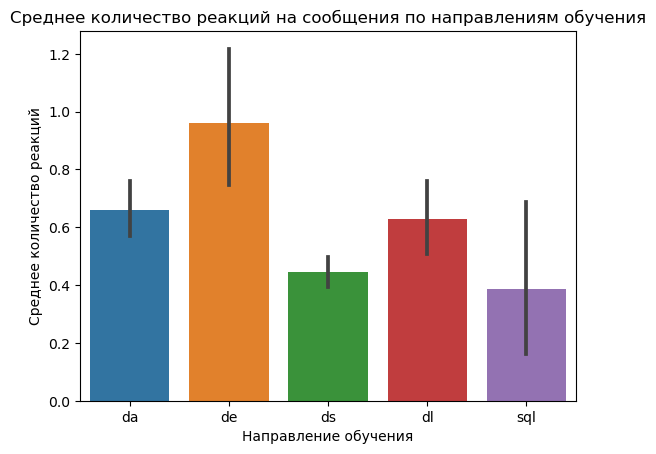

In [46]:
ax = sns.barplot(data=df, x='profession', y='reactions_count')
ax.set(xlabel='Направление обучения', ylabel='Среднее количество реакций', 
       title = 'Среднее количество реакций на сообщения по направлениям обучения');

Больше реакций ставят в `de`, а меньше всего в `ds` и `sql`.

Возможно кто-то предпочитает оставлять комментарии, а не реакции. Посмотрим, кто оставляет больше сообщений в день:

In [47]:
# Рассчитаем количество сообщений в день по когортам по направлениям
daily_messages = df.groupby(['profession', 'cohort', df.ts.dt.floor('d')])['client_msg_id'].count().reset_index()
daily_messages

,profession,cohort,ts,client_msg_id
0,da,da_02,2022-11-28,9
1,da,da_02,2022-11-29,2
2,da,da_02,2022-11-30,24
3,da,da_02,2022-12-01,7
4,da,da_02,2022-12-02,15
...,...,...,...,...
1032,sql,sql_04,2022-12-07,1
1033,sql,sql_04,2022-12-08,2
1034,sql,sql_04,2022-12-11,2
1035,sql,sql_04,2022-12-15,9


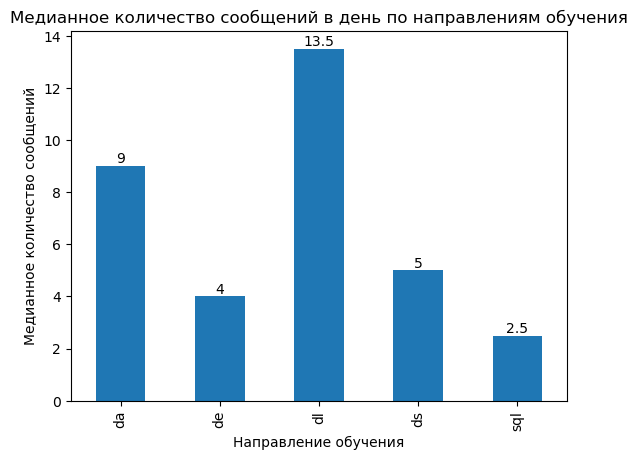

In [48]:
# Посчитаем среднее количество сообщений в день по направлению
ax = (daily_messages.groupby('profession')['client_msg_id']
      .median()
      .plot(kind='bar', title='Медианное количество сообщений в день по направлениям обучения',
                   ylabel='Медианное количество сообщений', xlabel='Направление обучения'))
for container in ax.containers:
    ax.bar_label(container);

Больше всего сообщений в день пишут в группах по `dl`. Возможно, это связано с тем, что `dl` - короткая программа обучения, общение более "концентрированное".

Теперь посмотрим на активность пользователей в разрезе **учебных когорт** внутри каждого направления (направление `sql` разбирать не будем, там только одна когорта):

''

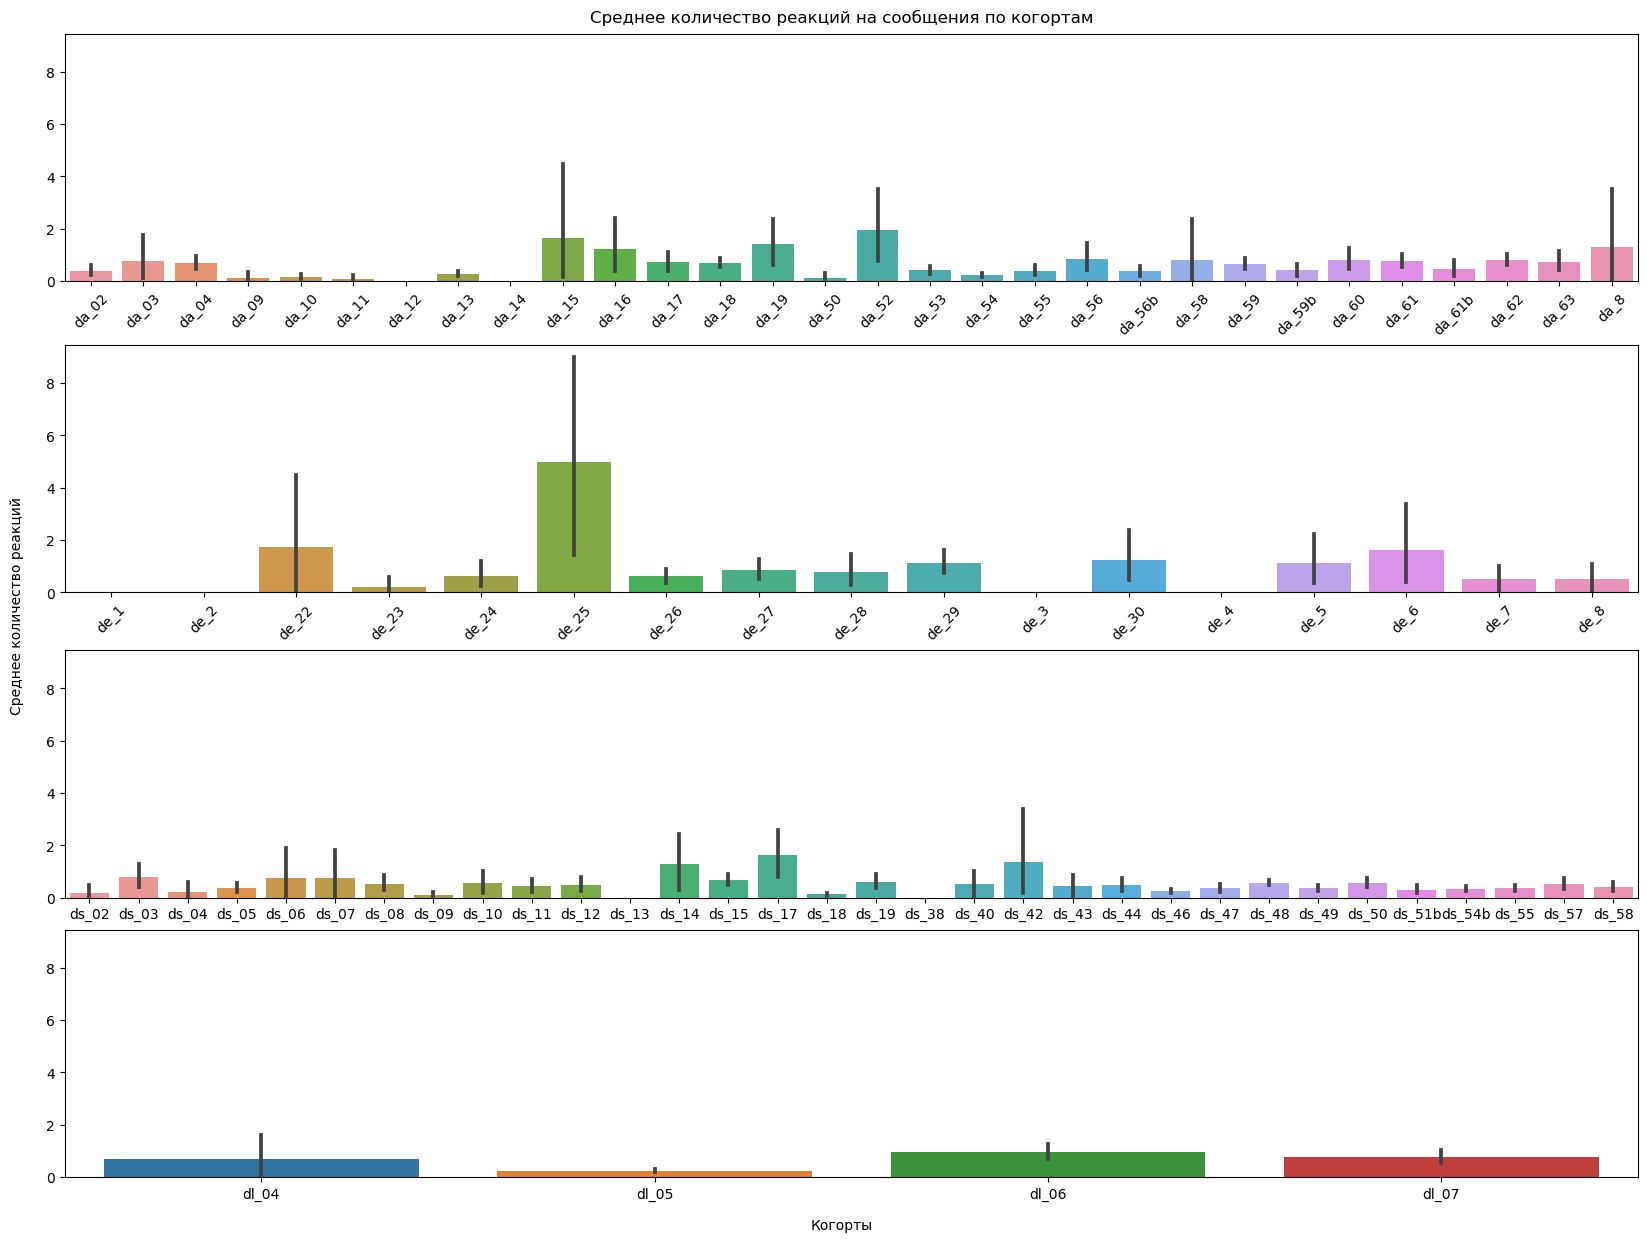

In [49]:
fig, axes = plt.subplots(4, 1, sharey=True, figsize=(16,12), constrained_layout=True)
fig.suptitle('Среднее количество реакций на сообщения по когортам')
fig.text(0.5, -0.02, 'Когорты', ha='center')
fig.text(-0.02, 0.5, 'Среднее количество реакций', va='center', rotation='vertical')
for i, prof in enumerate(df.profession.unique()[:-1]):
    sns.barplot(data=df.query('profession == @prof').sort_values(by='cohort'), x='cohort', y='reactions_count', ax=axes[i])

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)
axes[0].set(xlabel='', ylabel='')
axes[1].set(xlabel='', ylabel='')
axes[2].set(xlabel='', ylabel='')
axes[3].set(xlabel='', ylabel='')
;

''

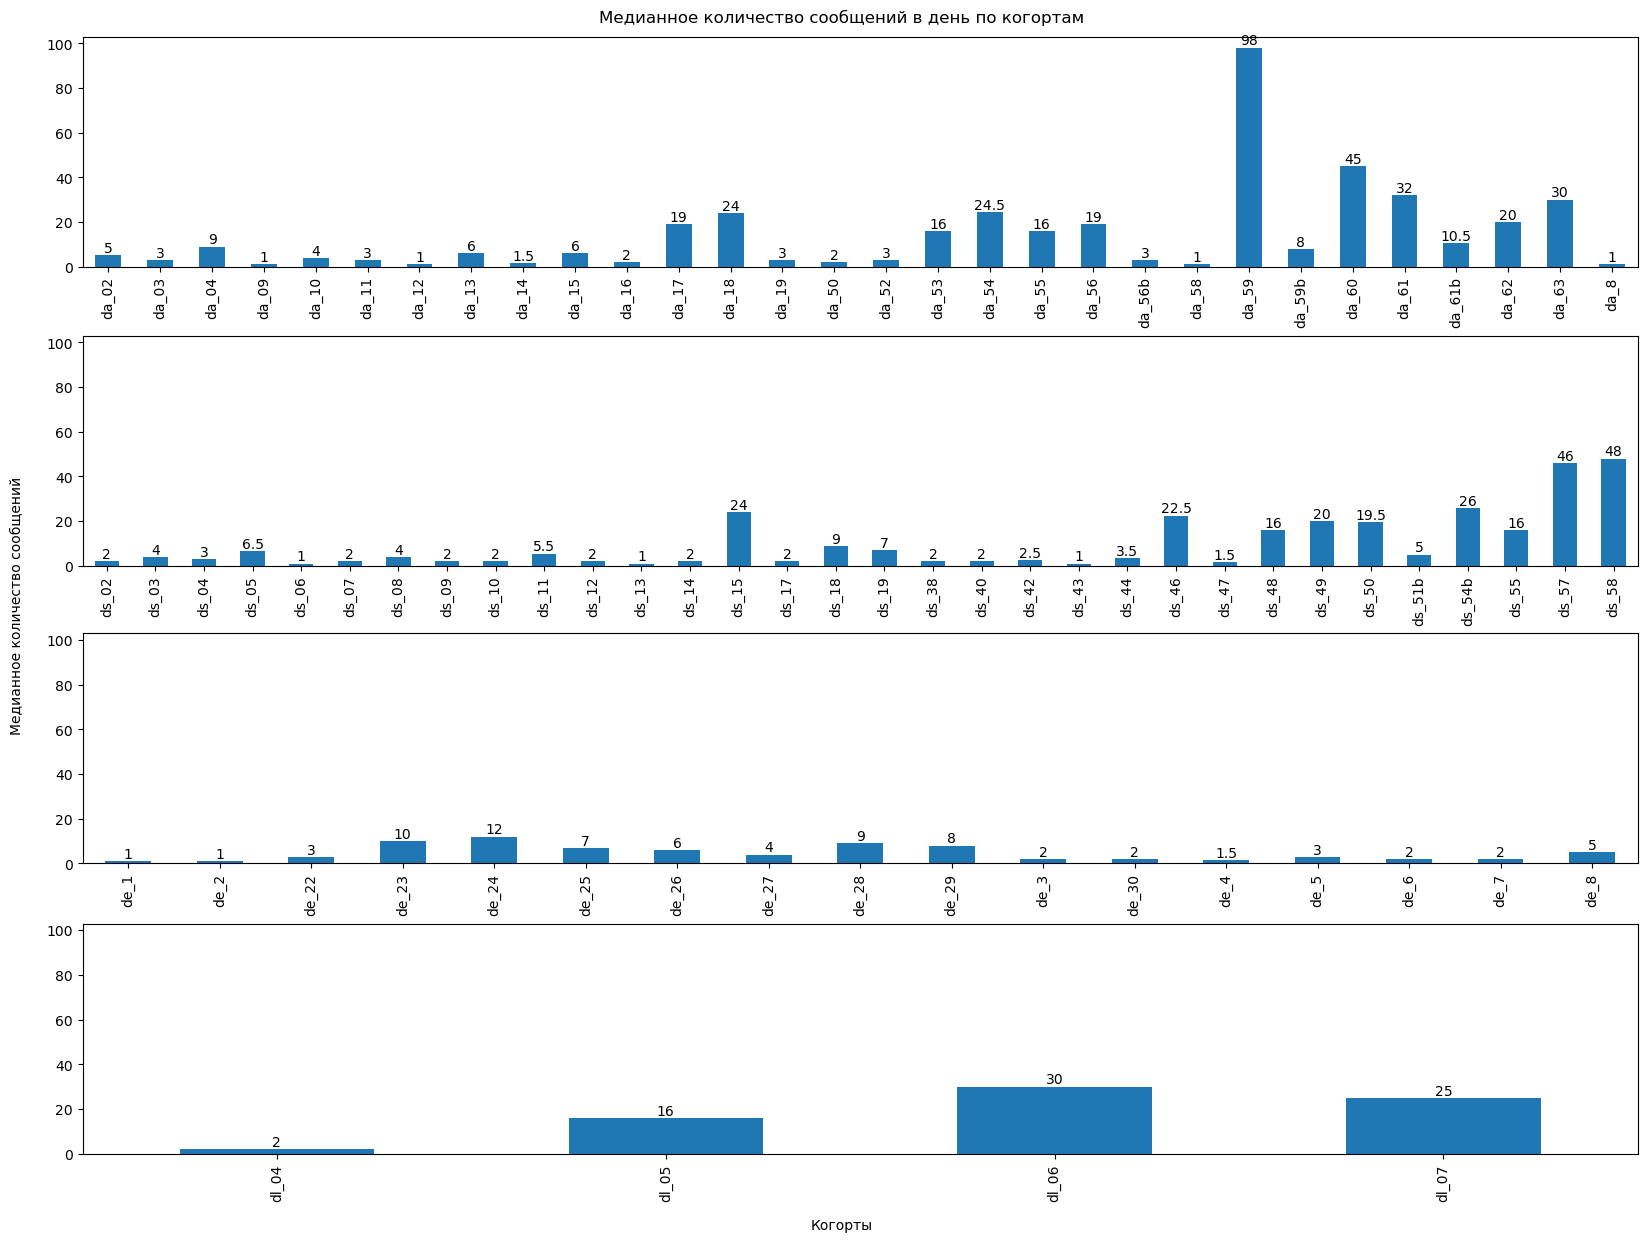

In [50]:
fig, axes = plt.subplots(4, 1, sharey=True, figsize=(16,12), constrained_layout=True)
fig.suptitle('Медианное количество сообщений в день по когортам')
fig.text(0.5, -0.02, 'Когорты', ha='center')
fig.text(-0.02, 0.5, 'Медианное количество сообщений', va='center', rotation='vertical')
daily_messages.query('profession=="da"').groupby('cohort')['client_msg_id'].median().plot(kind='bar', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
daily_messages.query('profession=="ds"').groupby('cohort')['client_msg_id'].median().plot(kind='bar', ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
    daily_messages.query('profession=="de"').groupby('cohort')['client_msg_id'].median().plot(kind='bar', ax=axes[2])
for container in axes[2].containers:
    axes[2].bar_label(container)
    daily_messages.query('profession=="dl"').groupby('cohort')['client_msg_id'].median().plot(kind='bar', ax=axes[3])
for container in axes[3].containers:
    axes[3].bar_label(container)
axes[0].set(xlabel='', ylabel='')
axes[1].set(xlabel='', ylabel='')
axes[2].set(xlabel='', ylabel='')
axes[3].set(xlabel='', ylabel='')
;

**Выводы:**
- Больше реакций ставят в `de`, а меньше всего в `ds` и `sql`.
- Больше всего сообщений в день пишут в группах по `dl`.
- Аномально активно ставят реакции в когорте `de-25`.
- Аномально много сообщений в день пишут в когорте `da-59`.
- В направлении `da` самые активные когорты по реакциям - 8, 15, 16, 19, 52.
- В направлении `ds` самые активные когорты по реакциям - 14, 17, 42.
- Самые активные когорты по количеству сообщений в день - более новые когорты, где люди знакомятся и публикуется сразу много информации.
Для более глубокого понимания активности в когортах интересно было бы поговорить с кураторами более активных когорт и узнать их мнение о том, что было такого в этих когортах, чего не было в других.

#### Аномальная активность в когортах
Мы заметили, что в когорте `de-25` ставят очень много реакций, а в когорте `da-59` пишут необычно много сообщений в день. Изучим эти когорты подробнее.

In [51]:
df.query('cohort == "de_25"')

,client_msg_id,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words,reactions_count,channel_type,profession,cohort,cohort_start
8954,5a233b26-c90a-4bc3-bc30-2f5748fd41f2,U02G4D0MGUU,2022-11-28 14:08:33,1.669657e+09,False,2022-11-28 14:08:33,NaN,de_25_community,2022-11-28,0,"[{'name': 'cat-high-five', 'users': ['U033YHVK...",586,80,12,other,de,de_25,2022-11-28 13:57:01
8955,99947589-90ca-4b76-809f-1e326f19adb4,U0308007A2K,2022-11-28 16:17:43,NaN,True,2022-11-28 14:08:33,NaN,de_25_community,2022-11-28,0,NaN,111,20,0,other,de,de_25,2022-11-28 13:57:01
8956,480B280C-0315-49D1-AB59-B0252CA6CCD8,U02G4D0MGUU,2022-11-28 17:42:02,NaN,True,2022-11-28 14:08:33,NaN,de_25_community,2022-11-28,0,"[{'name': 'heart', 'users': ['U0308007A2K'], '...",158,23,1,other,de,de_25,2022-11-28 13:57:01
8957,0e14a5e4-e89c-45d1-8d7d-48c84cd357e1,U02G4D0MGUU,2022-11-28 14:00:13,NaN,False,NaT,NaN,de_25_info,2022-11-28,0,"[{'name': 'conga_parrot', 'users': ['U03KF3K3A...",1198,167,8,info,de,de_25,2022-11-28 13:57:01
8958,58f9f8f5-efb4-4218-bc39-14e1abe17393,U019UVDN695,2022-11-28 13:57:01,1.669644e+09,False,2022-11-28 13:57:01,NaN,de_25_tutorial,2022-11-28,0,"[{'name': 'fire', 'users': ['U03KF3K3A3W', 'U0...",846,140,13,other,de,de_25,2022-11-28 13:57:01
8959,b4813be7-119b-4bc8-8169-6a4a0a7b56cc,U037NEN0N0J,2022-11-28 13:58:28,NaN,True,2022-11-28 13:57:01,NaN,de_25_tutorial,2022-11-28,0,NaN,18,3,0,other,de,de_25,2022-11-28 13:57:01
8960,8e58b383-b763-4612-bbae-1698d0cbd971,U03KF3K3A3W,2022-11-28 14:01:04,NaN,True,2022-11-28 13:57:01,NaN,de_25_tutorial,2022-11-28,0,"[{'name': 'heart', 'users': ['U03KCMBRGTC'], '...",46,5,1,other,de,de_25,2022-11-28 13:57:01


Для когорты `de-25` в датасете только семь сообщений, все размещены 28 ноября. Видимо, в выгрузку попали не все данные. На это указывают и другие признаки, например пропущенные порядковые номера когорт (понятно, что в старых когортах, закончивших обучение, может никто не писать, но куда пропали `da-51`, `da-57`, `ds-52`, `ds-53` и `ds-56`).

In [52]:
daily_messages.query('cohort == "da_59"')

,profession,cohort,ts,client_msg_id
300,da,da_59,2022-11-28,101
301,da,da_59,2022-11-29,98
302,da,da_59,2022-11-30,99
303,da,da_59,2022-12-01,125
304,da,da_59,2022-12-02,142
305,da,da_59,2022-12-03,148
306,da,da_59,2022-12-04,119
307,da,da_59,2022-12-05,109
308,da,da_59,2022-12-06,116
309,da,da_59,2022-12-07,98


C 28 ноября по 8 декабря в когорте `da-59` публиковалось много сообщений. Посмотрим как распределялись эти сообщения по типам каналов:

In [53]:
(df.query('cohort == "da_59"')
 .loc[(df['ts']>=pd.Timestamp('2022-11-28 00:00:00'))&(df['ts']<=pd.Timestamp('2022-12-08 23:59:59'))]
.groupby('channel_type')['client_msg_id'].count())

channel_type
exerciser    775
info          69
other          1
project      189
teamwork     225
Name: client_msg_id, dtype: int64

Что-то много понаписали в канале `exerciser`. Из доступных данных сложно сказать что-то подробнее, лучше поговорить с куратором и преподавателем канала и узнать чем была вызвана такая активность.

### Какие сообщения провоцируют наибольший отклик
Проверим, есть ли зависимость между количеством реакций на сообщения и **типом канала**:

In [54]:
df.groupby('channel_type')['reactions_count'].mean()

channel_type
exerciser    0.286670
info         1.768485
other        0.633287
project      0.205995
teamwork     0.636581
Name: reactions_count, dtype: float64

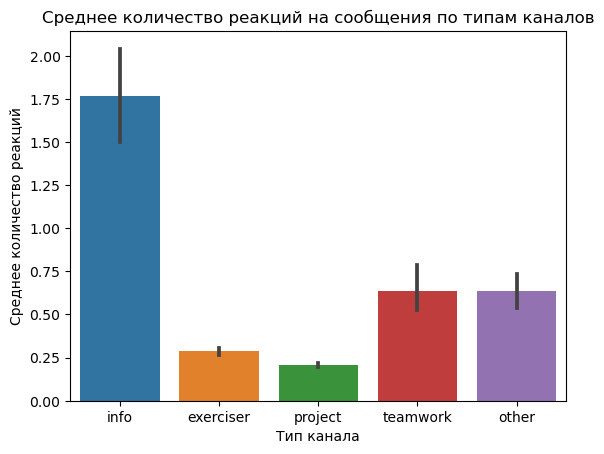

In [55]:
ax = sns.barplot(data=df, x='channel_type', y='reactions_count')
ax.set(xlabel='Тип канала', ylabel='Среднее количество реакций', 
       title = 'Среднее количество реакций на сообщения по типам каналов');

Больше всего реакций в каналах `info`, сообщения в каналах `exerciser` и `project` собирают меньше всего реакций.

Проверим, зависит ли количество реакций от **длины сообщения**:

In [56]:
df.groupby('text_words')['reactions_count'].mean()

text_words
0      0.592233
1      0.410915
2      0.274443
3      0.313272
4      0.296667
         ...   
547    3.000000
600    3.000000
655    8.000000
702    0.000000
989    0.000000
Name: reactions_count, Length: 278, dtype: float64

''

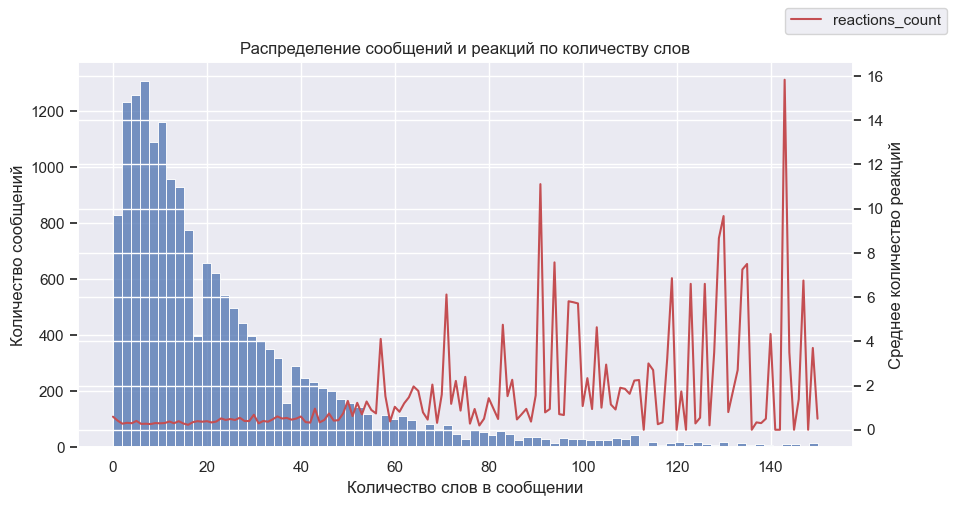

In [57]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.histplot(data=df.query('text_words <= 150'), x="text_words")
ax.set(xlabel='Количество слов в сообщении', ylabel='Количество сообщений', 
       title = 'Распределение сообщений и реакций по количеству слов')
ax2 = ax.twinx()
df.query('text_words <= 150').groupby('text_words')['reactions_count'].mean().plot(ax=ax2, legend=False, color="r")
ax2.set_ylabel('Среднее количество реакций')
ax.figure.legend()
;

На графике видно, что чем сообщение длиннее, тем больше реакций оно в среднем собирает. Это отчётливо видно на диапазоне от нуля до 90-110 слов в сообщении. Дальше, видимо, сообщений становится слишком мало, чтобы делать по ним какие-то выводы. Пока можно сказать, что чтобы повысить вероятность реакций, сообщение должно быть не короче 50-60 слов.

Теперь проверим, зависит ли количество реакций от **времени публикации сообщения**:

''

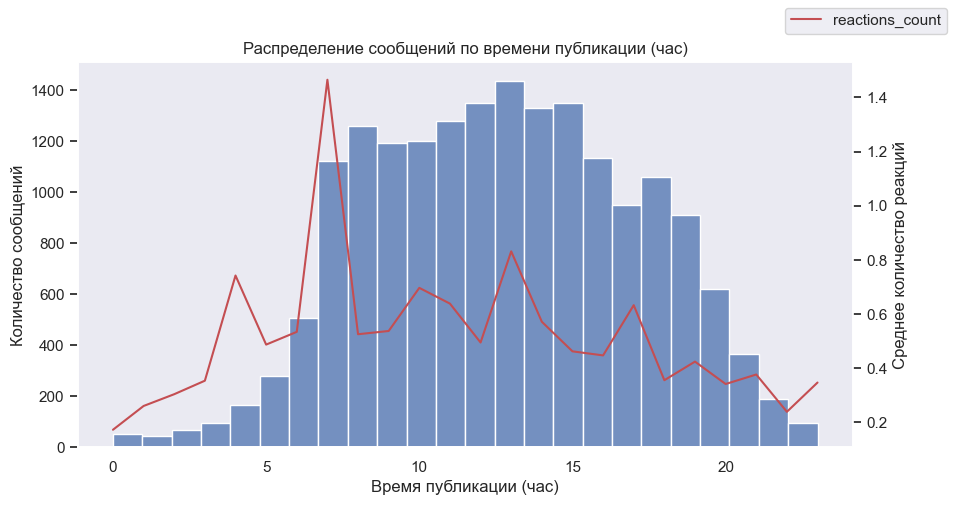

In [58]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.histplot(data=df, x=df['ts'].dt.hour, bins=24)
ax.set(xlabel='Время публикации (час)', ylabel='Количество сообщений', 
       title = 'Распределение сообщений по времени публикации (час)')
ax.grid(False)
ax2 = ax.twinx()
df.groupby(df['ts'].dt.hour)['reactions_count'].mean().plot(ax=ax2, legend=False, color="r")
ax2.set_ylabel('Среднее количество реакций')
ax2.grid(False)
ax.figure.legend()
;

''

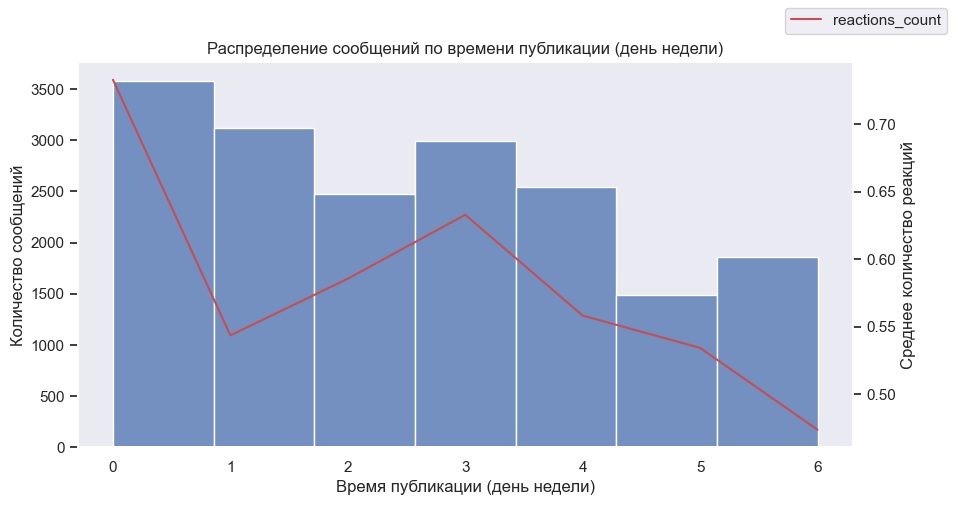

In [59]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.histplot(data=df, x=df['ts'].dt.weekday, bins=7)
ax.set(xlabel='Время публикации (день недели)', ylabel='Количество сообщений', 
       title = 'Распределение сообщений по времени публикации (день недели)')
ax.grid(False)
ax2 = ax.twinx()
df.groupby(df['ts'].dt.weekday)['reactions_count'].mean().plot(ax=ax2, legend=False, color="r")
ax2.set_ylabel('Среднее количество реакций')
ax2.grid(False)
ax.figure.legend()
;

''

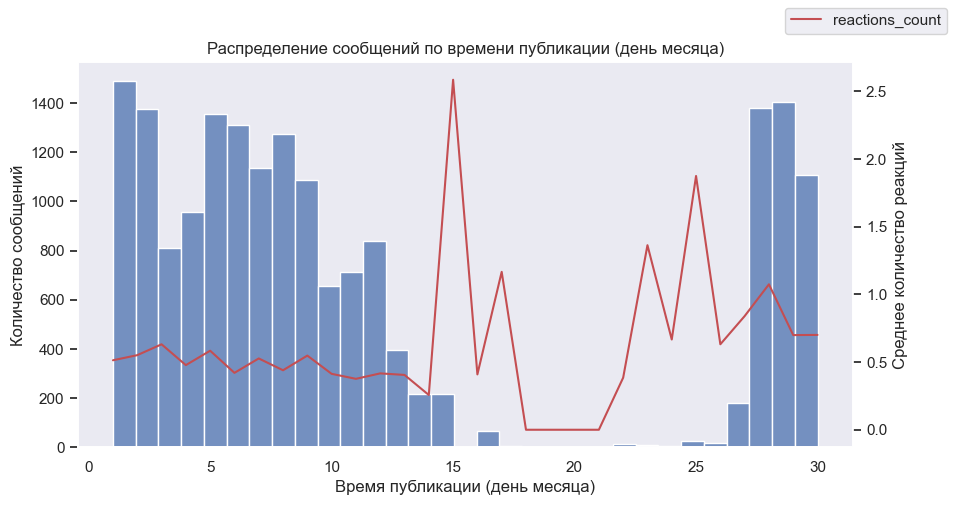

In [60]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.histplot(data=df, x=df['ts'].dt.day, bins=31)
ax.set(xlabel='Время публикации (день месяца)', ylabel='Количество сообщений', 
       title = 'Распределение сообщений по времени публикации (день месяца)')
ax.grid(False)
ax2 = ax.twinx()
df.groupby(df['ts'].dt.day)['reactions_count'].mean().plot(ax=ax2, legend=False, color="r")
ax2.set_ylabel('Среднее количество реакций')
ax2.grid(False)
ax.figure.legend()
;

In [61]:
min(df['ts'])

Timestamp('2022-10-21 09:00:00')

In [62]:
max(df['ts'])

Timestamp('2022-12-25 11:33:22')

В датасете есть сообщения, размещённые с 21 октября по 25 декабря. Провалы в количестве сообщений с 15 по 26 число выглядят подозрительно. Посмотрим в чём может быть дело:

''

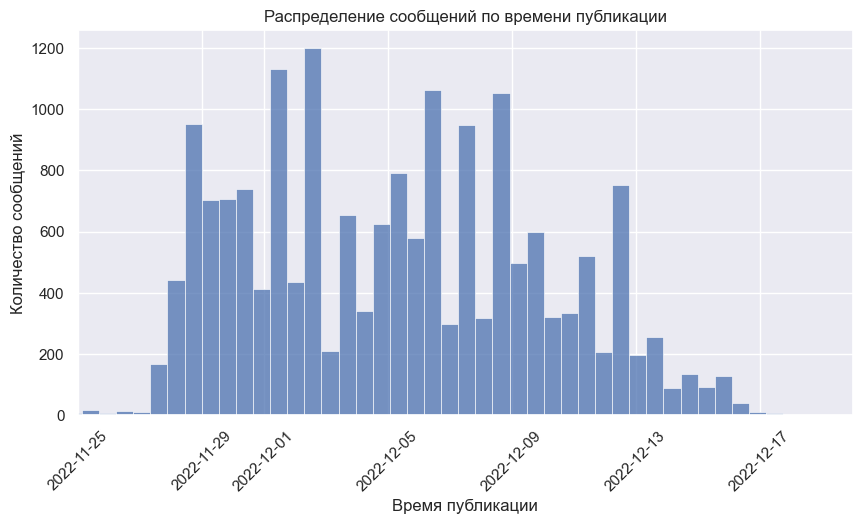

In [63]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.histplot(data=df, x=df['ts'])
ax.set(xlabel='Время публикации', ylabel='Количество сообщений', 
       title = 'Распределение сообщений по времени публикации',
      xlim=(pd.Timestamp('2022-11-25 00:00:00'),pd.Timestamp('2022-12-20 00:00:00')))
ax.tick_params('x', labelrotation=45)
;

Получается, что реальный временной диапазон датафрейма - это с 27 ноября по 15 декабря 2022 года, даже полного месяца нет. Среднее количество реакций на сообщения в этом периоде практически не менялось.

**Выводы:**
- Больше всего реакций в каналах `info`, сообщения в каналах `exerciser` и `project` собирают меньше всего реакций.
- Чем сообщение длиннее, тем больше реакций оно в среднем собирает. Чтобы повысить вероятность реакций, сообщение должно быть не короче 50-60 слов.
- Больше всего реакций собирают сообщения, опубликованные в 7 часов утра. Также есть пики реакций в 10, 13 и 17 часов.
- Больше всего реакций пользователи ставят по понедельникам и четвергам.
- День месяца публикации не влияет на количество реакций.

### Новые когорты
Интересно было бы посмотреть как меняется поведение пользователей в зависимости от срока обучения.

Поскольку нам доступны для анализа сообщения за довольно ограниченный период, не получится для всех когорт посмотреть динамику активности в зависимости от срока обучения. Однако можно попробовать это сделать это для самых новых когорт: `da-62`, `da-63`, `ds-57` и `ds-58`.

In [64]:
new_cohorts = ['da_62','da_63','ds_57','ds_58']
new_df = df.query('cohort in @new_cohorts')
new_df['cohort_start'].unique()

array(['2022-11-22T15:26:56.000000000', '2022-11-28T07:15:00.000000000',
       '2022-11-28T05:55:00.000000000', '2022-11-28T05:41:48.000000000'],
      dtype='datetime64[ns]')

Нет, первые сообщения в этих когортах появляются 28 ноября, как и в большинстве остальных. Если посмотреть на когорты, в которых первые сообщения появились в период с 3 по 15 декабря, то результаты тоже не выглядят как новые когорты:

In [65]:
(df.loc[(df['cohort_start'] >=pd.Timestamp('2022-12-03 00:00:00'))&(df['cohort_start'] <=pd.Timestamp('2022-12-15 00:00:00'))]
['cohort'].unique())

array(['de_1', 'de_2', 'ds_54b'], dtype=object)

**Вывод:** для когортного анализа нужны данные за больший период времени.

## Выводы

1. Ограничения в данных:
- реальный временной диапазон анализируемых данных - с 27 ноября по 15 декабря 2022 года,
- в данных полностью отстутствуют сообщения из некоторых когорт.
2. Активность участников:
- Больше реакций ставят в `de`, а меньше всего в `ds` и `sql`.
- Больше всего сообщений в день пишут в группах по `dl`. Возможно, это связано с тем, что `dl` - короткая программа обучения, общение более "концентрированное".
- В направлении `da` самые активные когорты по реакциям - 8, 15, 16, 19, 52.
- В направлении `ds` самые активные когорты по реакциям - 14, 17, 42.
- Самые активные когорты по количеству сообщений в день - более новые когорты, где люди знакомятся и публикуется сразу много информации.
- Для более глубокого понимания активности в когортах интересно было бы поговорить с кураторами более активных когорт и узнать их мнение о том, что было такого в этих когортах, чего не было в других.
- C 28 ноября по 8 декабря в когорте `da-59` публиковалось много сообщений в канале `exerciser`. Интересно было бы поговорить с куратором и преподавателем канала и узнать чем была вызвана такая активность.
3. Сообщения, провоцирующие наибольший отклик:
- Больше всего реакций в каналах `info`, сообщения в каналах `exerciser` и `project` собирают меньше всего реакций.
- Чем сообщение длиннее, тем больше реакций оно в среднем собирает. Чтобы повысить вероятность реакций, сообщение должно быть не короче 50-60 слов.
- Больше всего реакций собирают сообщения, опубликованные в 7 часов утра. Также есть пики реакций в 10, 13 и 17 часов.
- Больше всего реакций пользователи ставят по понедельникам и четвергам.
- День месяца публикации не влияет на количество реакций.